In [1]:
import pandas as pd
import glob
import networkx as nx
from functions import *
import os
import scipy as sp
import scipy.io  
import io
import snap

In [2]:
path = "less_than_1500_nodes"
[x.replace("{}\\".format(path), "") for x in glob.glob("{}/*".format(path))]

['7th_graders',
 'aves-weaver-social',
 'bt.csv',
 'contacts-prox-high-school-2013',
 'contacts-prox-high-school-2013-attr',
 'email_company',
 'fb-messages',
 'fb-pages-politician',
 'fb-pages-tvshow',
 'fb_friends.csv',
 'high_tech_company',
 'inf-euroroad',
 'infect-dublin',
 'infect-hyper',
 'Karate',
 'kidnappings',
 'KKI',
 'kor.2015.mers.1.00',
 'law_firm',
 'moreno_taro',
 'physician_trust',
 'primary-school-proximity',
 'sgp.2003.sars.1.00',
 'soc-firm-hi-tech',
 'soc-hamsterster',
 'swingers',
 'uni_email',
 'usa.2009.flu.1.00',
 'usa.2020.covid.6.00',
 'webkb-wisc']

In [3]:
data_paths = [x.replace("{}\\".format(path), "") for x in glob.glob("{}/*".format(path))]

In [4]:
G_list = []
for d_path in data_paths:
    print(d_path)
    if any(fname.endswith('.csv') for fname in  glob.glob('{}/{}/*'.format(path,d_path))):
        df = pd.read_csv('{}/{}/edges.csv'.format(path,d_path))
        G = nx.from_pandas_edgelist(df, "# source", " target")
        
    elif any(fname.endswith('.edgelist') for fname in glob.glob('{}/{}/*'.format(path,d_path))):
        G = nx.read_edgelist("{}/{}/edges.edgelist".format(path, d_path), nodetype=int)
        
    elif not any(fname.endswith('txt.gz') for fname in  glob.glob('{}/{}/*'.format(path,d_path))):
        G = nx.read_adjlist("{}/{}/edges.txt".format(path, d_path), nodetype=int)

    else:
        G = nx.read_adjlist(gzip.open('{}/{}/edges.txt.gz'.format(path,d_path)), nodetype=int)
            
    G_list.append(G)

7th_graders
aves-weaver-social
bt.csv
contacts-prox-high-school-2013
contacts-prox-high-school-2013-attr
email_company
fb-messages
fb-pages-politician
fb-pages-tvshow
fb_friends.csv
high_tech_company
inf-euroroad
infect-dublin
infect-hyper
Karate
kidnappings
KKI
kor.2015.mers.1.00
law_firm
moreno_taro
physician_trust
primary-school-proximity
sgp.2003.sars.1.00
soc-firm-hi-tech
soc-hamsterster
swingers
uni_email
usa.2009.flu.1.00
usa.2020.covid.6.00
webkb-wisc


In [5]:
G_list

In [6]:
%%time
# Parameters 
nsamp = 10
p = 0.05
big_dat = pd.DataFrame({"seeding method": ['random']*nsamp + ['friend']*nsamp + ['pair']*nsamp})

for i,G in enumerate(G_list):    
    try:
        print(data_paths[i])
        print(nx.number_of_nodes(G_list[i]))

        (rtran, ftran, ptran) = sim_2seed_transitivity(G_list[i], p = p, nsamp = nsamp)
        # append results as columns
        big_dat["{}_num_nodes:{}".format(data_paths[i],  nx.number_of_nodes(G_list[i]))] = rtran + ftran + ptran
    except:
        print(data_paths[i])
    

7th_graders
29
aves-weaver-social
445
bt.csv
692
contacts-prox-high-school-2013
327
contacts-prox-high-school-2013-attr
327
email_company
167
fb-messages
1899
fb-pages-politician
5908
fb-pages-tvshow
3892
fb_friends.csv
800
high_tech_company
21
inf-euroroad
1174
infect-dublin
410
infect-hyper
113
Karate
34
kidnappings
351
kidnappings
KKI
2238
kor.2015.mers.1.00
186
kor.2015.mers.1.00
law_firm
71
moreno_taro
22
physician_trust
241
primary-school-proximity
242
sgp.2003.sars.1.00
172
sgp.2003.sars.1.00
soc-firm-hi-tech
33
soc-hamsterster
2426
swingers
96
swingers
uni_email
1133
usa.2009.flu.1.00
286
usa.2009.flu.1.00
usa.2020.covid.6.00
92
usa.2020.covid.6.00
webkb-wisc
265
Wall time: 14min 22s


In [7]:
big_dat.to_csv("2seedTransivityData1.csv")

# Random Graphs

In [6]:
G_random_BA = []
G_random_configuration = []
G_random_poisson = []

for i, G_empirical in enumerate(G_list):

    print(data_paths[i])

    try:
        G_BA = nx.barabasi_albert_graph(len(G_empirical.nodes()), int(np.average(G_empirical.degree())/2))
        G_random_BA.append(G_BA)

    except:
        print("BA")
        G_random_BA.append(None)

    try:
        G_poisson =  nx.erdos_renyi_graph(len(G_empirical.nodes()), 
                                      np.mean(list(dict(G_empirical.degree()).values()))/(len(G_empirical.nodes()) - 1), seed = 2022)
        largest_component = sorted(nx.connected_components(G_poisson), key=len, reverse=True)
        G_poisson = G_poisson.subgraph(largest_component[0])
        G_random_poisson.append(G_poisson)
    except:
        print("Poisson")
        G_random_poisson.append(None)

    try:
        G_config = nx.configuration_model(list(dict(G_empirical.degree()).values()), seed = 2022)
        largest_component = sorted(nx.connected_components(G_config), key=len, reverse=True)
        G_config = G_config.subgraph(largest_component[0])
        G_random_configuration.append(G_config)
    except:
        print("Configuration")
        G_random_configuration.append(None)



7th_graders
aves-weaver-social
bt.csv
contacts-prox-high-school-2013
contacts-prox-high-school-2013-attr
email_company
fb-messages
fb-pages-politician
fb-pages-tvshow
fb_friends.csv
high_tech_company
inf-euroroad
infect-dublin
infect-hyper
Karate
kidnappings
KKI
kor.2015.mers.1.00
BA
law_firm
moreno_taro
physician_trust
primary-school-proximity
sgp.2003.sars.1.00
BA
soc-firm-hi-tech
soc-hamsterster
swingers
uni_email
usa.2009.flu.1.00
BA
usa.2020.covid.6.00
BA
webkb-wisc


In [ ]:
%%time
# Parameters 
nsamp = 10
p = 0.05
big_dat_random_BA = pd.DataFrame({"seeding method": ['random']*nsamp + ['friend']*nsamp + ['pair']*nsamp})
big_dat_random_configuration = pd.DataFrame({"seeding method": ['random']*nsamp + ['friend']*nsamp + ['pair']*nsamp})
big_dat_random_poisson = pd.DataFrame({"seeding method": ['random']*nsamp + ['friend']*nsamp + ['pair']*nsamp})

for i,G in enumerate(G_random_BA): 
    
    print(data_paths[i])
    
    if len(G_list[i].nodes()) < 3500:
        print(nx.number_of_nodes(G_list[i]))
    
        try:
            print("BA")
            (rtran, ftran, ptran) = sim_2seed_transitivity(G_random_BA[i], p = p, nsamp = nsamp)
            big_dat_random_BA["{}_num_nodes:{}".format(data_paths[i],  nx.number_of_nodes(G_random_BA[i]))] = rtran + ftran + ptran
        except:
            print("Failed")
        try:
            print("Configuration")
            (rtran, ftran, ptran) = sim_2seed_transitivity(G_random_configuration[i], p = p, nsamp = nsamp)
            big_dat_random_configuration["{}_num_nodes:{}".format(data_paths[i],  nx.number_of_nodes(G_random_configuration[i]))] = rtran + ftran + ptran
        except:
            print("Failed")
        try:
            print("Poisson")
            (rtran, ftran, ptran) = sim_2seed_transitivity(G_random_poisson[i], p = p, nsamp = nsamp)
            big_dat_random_poisson["{}_num_nodes:{}".format(data_paths[i],  nx.number_of_nodes(G_random_poisson[i]))] = rtran + ftran + ptran
        except:
            print("Failed")


7th_graders
29
BA
Configuration
Failed
Poisson
aves-weaver-social
445
BA
Configuration
Failed
Poisson
bt.csv
692
BA
Configuration
Failed
Poisson


In [164]:
big_dat_random_configuration

NameError: name 'big_dat_random_configuration' is not defined

In [10]:
big_dat_random.to_csv("2seedTransivityDataRandom1.csv")

# Calculate Clustering Coefficients of Networks

In [165]:
individualClustering_empirical = [nx.clustering(G) for G in G_list]
individualDegree_empirical = [dict(G.degree()) for G in G_list]

individualClustering_random_BA = [nx.clustering(G) if G is not None else None for G in G_random_BA]
individualDegree_random_BA = [dict(G.degree()) if G is not None else None for G in G_random_BA]

averageClustering_empirical = [np.mean(list(G.values())) for G in individualClustering_empirical]
averageClustering_random_BA = [np.mean(list(G.values())) if G is not None else None for G in individualClustering_random_BA]

sdClustering_empirical = [np.std(list(G.values())) for G in individualClustering_empirical]
sdClustering_random_BA = [np.std(list(G.values())) if G is not None else None for G in individualClustering_random_BA]


averageDegree_empirical = [np.mean(list(d_seq.values())) for d_seq in individualDegree_empirical]
averageDegree_random_BA = [np.mean(list(d_seq.values())) if d_seq is not None else None for d_seq in individualDegree_random_BA]


sdDegree_empirical = [np.std(list(d_seq.values())) for d_seq in individualDegree_empirical]
sdDegree_random_BA = [np.std(list(d_seq.values())) if d_seq is not None else None for d_seq in individualDegree_random_BA]


individualTriangle_empirical = [nx.triangles(G) if G is not None else None for G in G_list]
individualTriangle_random_BA = [nx.triangles(G) if G is not None else None for G in G_random_BA]


In [162]:
clusteringData = pd.DataFrame([data_paths, 
                               averageClustering_empirical, 
                               averageClustering_random_BA,
                               sdClustering_empirical,
                               sdClustering_random_BA,
                               averageDegree_empirical,
                               averageDegree_random_BA,
                               sdDegree_empirical,
                               sdDegree_random_BA
                               ]).transpose()
clusteringData.columns = ["network", 
                          "empirical_clust", 
                          "random_clust_BA", 
                          "empirical_clustSD", 
                          "random_clustSD_BA",
                         "empirical_avgDegree",
                         "random_avgDegree_BA",
                         "empirical_sdDegree",
                         "random_sdDegree_BA"]
clusteringData
clusteringData.to_csv("clusteringData.csv")

In [202]:
individualNodeAttributes = pd.DataFrame([data_paths, 
              individualTriangle_empirical,
              individualTriangle_random_BA,
              individualDegree_empirical,
              individualDegree_random_BA
                               ]).transpose()

individualNodeAttributes.columns = ["network", 
                          "empirical_triangle",
                          "random_triangle",
                          "empirical_degree",
                          "random_degree"]




In [239]:
nodeDf = pd.DataFrame()
for i, name in enumerate(data_paths):
    df = pd.DataFrame([individualTriangle_empirical[i],individualDegree_empirical[i]]).T.rename({0: "Triangle", 1: "Degree"}, axis = 1)
    df["network"] = data_paths[i]
    df = df.reset_index()
    nodeDf = nodeDf.append(df)
    
    df = pd.DataFrame([individualTriangle_random_BA[i],individualDegree_random_BA[i]]).T.rename({0: "Triangle", 1: "Degree"}, axis = 1)
    df["network"] = "random_" + data_paths[i]
    df = df.reset_index()
    nodeDf = nodeDf.append(df)

In [241]:
nodeDf.to_csv("individualNodeProporties.csv")

In [188]:
np.where(np.array(data_paths) == 'uni_email')

# data_paths

(array([26], dtype=int64),)

<AxesSubplot: xlabel='Degree', ylabel='Triangles'>

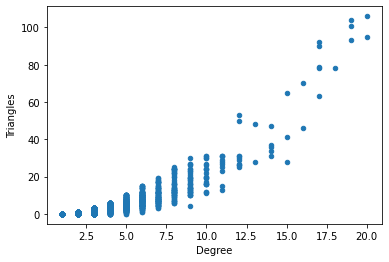

In [183]:
pd.DataFrame([individualDegree_empirical[16], individualTriangle_empirical[16]]).T.rename(columns= {0:"Degree", 1: "Triangles"}).plot(x = "Degree", y = "Triangles", kind = "scatter")

<AxesSubplot: xlabel='Degree', ylabel='Triangles'>

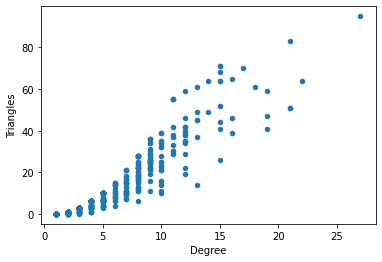

In [184]:
pd.DataFrame([individualDegree_empirical[1], individualTriangle_empirical[1]]).T.rename(columns= {0:"Degree", 1: "Triangles"}).plot(x = "Degree", y = "Triangles", kind = "scatter")

<AxesSubplot: xlabel='Degree', ylabel='Triangles'>

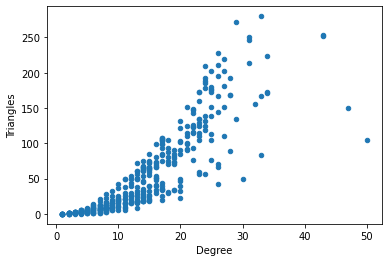

In [186]:
pd.DataFrame([individualDegree_empirical[12], individualTriangle_empirical[12]]).T.rename(columns= {0:"Degree", 1: "Triangles"}).plot(x = "Degree", y = "Triangles", kind = "scatter")

<AxesSubplot: xlabel='Degree', ylabel='Triangles'>

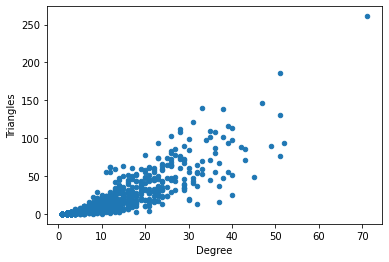

In [189]:
pd.DataFrame([individualDegree_empirical[26], individualTriangle_empirical[26]]).T.rename(columns= {0:"Degree", 1: "Triangles"}).plot(x = "Degree", y = "Triangles", kind = "scatter")

<AxesSubplot: xlabel='Degree', ylabel='Triangles'>

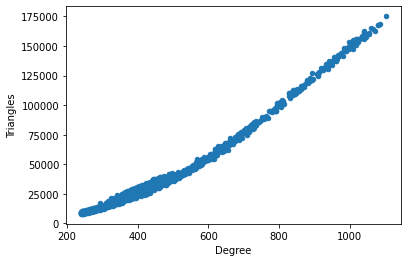

In [187]:
pd.DataFrame([individualDegree_random_BA[6], individualTriangle_random_BA[6]]).T.rename(columns= {0:"Degree", 1: "Triangles"}).plot(x = "Degree", y = "Triangles", kind = "scatter")

<AxesSubplot: xlabel='Degree', ylabel='Triangles'>

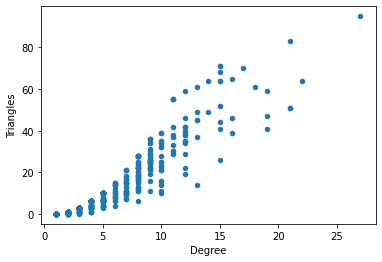

In [178]:
pd.DataFrame([individualDegree_empirical[1], individualTriangle_empirical[1]]).T.rename(columns= {0:"Degree", 1: "Triangles"}).plot(x = "Degree", y = "Triangles", kind = "scatter")